This notebook will apply the PCA method to the music features data and then conduct the following clustering methods: 
1. k-means
2. hierarchical


In [174]:
import pandas as pd 
import matplotlib
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import os

In [175]:
#Read music feature data into python
file_name = 'music_features.csv'
music_features = pd.read_csv(file_name, index_col=0)

In [176]:
music_features.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence
160541,0.131,0.748,188491.0,0.627,000xQL6tZNLJzIrtIgxqSl,0.000000,7.0,0.0852,-6.029,1.0,0.0639,120.963,4.0,audio_features,0.524
45268,0.684,0.509,187119.0,0.803,000xYdQfIZ4pDmBGzQalKU,0.000539,0.0,0.4630,-6.743,1.0,0.0400,166.018,4.0,audio_features,0.651
236479,0.105,0.772,167866.0,0.635,001b8t3bYPfnabpjpfG1Y4,0.000000,9.0,0.1170,-4.846,1.0,0.3720,95.951,4.0,audio_features,0.541
218937,0.145,0.807,188395.0,0.552,001cKCt7jEOzXjqgkn9DQf,0.000000,8.0,0.0999,-8.966,1.0,0.3050,119.988,4.0,audio_features,0.287
193090,0.159,0.683,180933.0,0.676,003F0rm5lqxcmhvJPKgfaJ,0.000000,1.0,0.0726,-6.688,0.0,0.1470,98.992,4.0,audio_features,0.434


In [177]:
music_features = music_features.drop(columns=['type'])

In [178]:
music_features.nunique()

acousticness         3599
danceability          889
duration_ms         49403
energy               1220
id                  88126
instrumentalness     5142
key                    12
liveness             1669
loudness            13366
mode                    2
speechiness          1473
tempo               37438
time_signature          5
valence              1470
dtype: int64

In [179]:
features = list(music_features)

In [180]:
features.remove('id')

Text(0.5, 1.0, 'Correlation between Music Features')

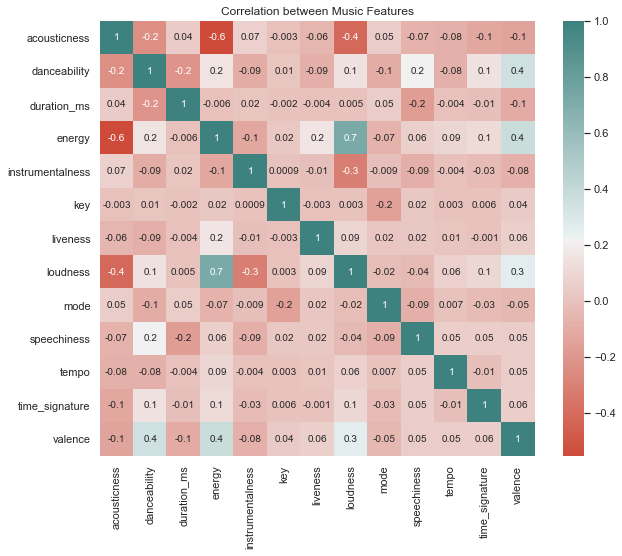

In [181]:
#Correlation

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = music_features.corr()
sns.heatmap(corr, cmap=sb.diverging_palette(16, 186, as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".1g")

ax.set_title('Correlation between Music Features')

#Energy may be removed


In [182]:
#Remove loudness
music_features = music_features.drop(columns=['loudness'])
features.remove('loudness')
music_features

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence
160541,0.131,0.748,188491.0,0.627,000xQL6tZNLJzIrtIgxqSl,0.000000,7.0,0.0852,1.0,0.0639,120.963,4.0,0.524
45268,0.684,0.509,187119.0,0.803,000xYdQfIZ4pDmBGzQalKU,0.000539,0.0,0.4630,1.0,0.0400,166.018,4.0,0.651
236479,0.105,0.772,167866.0,0.635,001b8t3bYPfnabpjpfG1Y4,0.000000,9.0,0.1170,1.0,0.3720,95.951,4.0,0.541
218937,0.145,0.807,188395.0,0.552,001cKCt7jEOzXjqgkn9DQf,0.000000,8.0,0.0999,1.0,0.3050,119.988,4.0,0.287
193090,0.159,0.683,180933.0,0.676,003F0rm5lqxcmhvJPKgfaJ,0.000000,1.0,0.0726,0.0,0.1470,98.992,4.0,0.434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154441,0.036,0.850,136913.0,0.739,7zy0jQ2un779v9bmBrBVCV,0.000000,7.0,0.2890,1.0,0.2290,112.063,4.0,0.602
155996,0.728,0.423,260573.0,0.360,7zyYmIdjqqiX6kLryb7QBx,0.000000,3.0,0.1050,1.0,0.0372,130.576,4.0,0.291
101624,0.200,0.637,241564.0,0.741,7zyofXGhXgaqT8fhvLufdf,0.000000,9.0,0.1850,1.0,0.0300,89.982,4.0,0.419
114871,0.353,0.819,208608.0,0.679,7zzI3SbctTJN6wDerZNZCD,0.000000,11.0,0.2910,0.0,0.1040,139.983,4.0,0.551


In [183]:
from sklearn.preprocessing import StandardScaler

feature_values = music_features.loc[:, features].values
normalized_values = StandardScaler().fit_transform(feature_values) # normalizing the features
np.mean(normalized_values),np.std(normalized_values)

(7.941778739950387e-17, 1.0)

In [184]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(normalized_values)
principalDF = pd.DataFrame(data = principalComponents)

In [185]:
principalDF.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.323942,-0.084281,-0.429661,0.539490,0.316716,-0.193799,-0.552014,-0.386483,-1.078083,-0.196367
1,0.378961,1.939718,-1.175013,-1.792848,-0.728229,-0.156206,0.386362,-1.590256,1.393964,-0.722652
2,-1.113958,-1.430243,-0.370018,-0.188560,-0.127277,0.513607,0.341231,0.172161,-1.670083,1.202473
3,-0.272934,-1.200805,-0.400036,-0.307038,0.730169,0.551727,0.424344,0.271747,-1.539700,0.879469
4,-0.370050,-0.649380,-0.404402,0.609033,0.219347,-0.063008,0.235505,1.458883,0.654913,-0.757454


## Hierarchical Clustering

In [ ]:
#get sample of principal components to run in dendogram 
principalDF_sample = principalDF.sample(frac=0.50, replace = False)

In [42]:
dendrogram = sch.dendrogram(sch.linkage(principalDF_sample.values, method  = "ward"))
f, ax = plt.subplots(figsize=(10, 8))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [104]:
hc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
#hc6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

In [105]:
principalDF_sample['AC Cluster 4'] = hc4.fit_predict(principalDF_sample.values)
#principalDF_sample['AC Cluster 6'] = hc6.fit_predict(principalDF_sample.values)

In [106]:
music_features['AC Cluster 4'] = principalDF_sample['AC Cluster 4']
#music_features['AC Cluster 6'] = principalDF_sample['AC Cluster 6']

In [107]:
music_features[music_features['AC Cluster 4'].notnull()] 

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,AC Cluster 4,AC Cluster 6
7610,0.3950,0.552,241014.0,0.578,009Zz28Vgvnc5FvMXs6dEm,0.000000,11.0,0.1460,-9.318,0.0,0.3360,89.662,4.0,0.590,0.0,0.0
31581,0.7020,0.543,274960.0,0.373,009j4tQyJC53rmgTuXil9E,0.000003,11.0,0.1070,-10.504,1.0,0.0303,114.956,4.0,0.245,0.0,1.0
23060,0.4510,0.470,277310.0,0.475,00C47repvBYiWwkfE99faH,0.000000,8.0,0.1340,-6.730,1.0,0.0321,123.852,4.0,0.209,0.0,0.0
61060,0.2010,0.743,101851.0,0.454,00JZgGi6ZTM4jAvJcp4oIv,0.050400,0.0,0.1100,-5.522,1.0,0.0719,144.981,4.0,0.714,0.0,0.0
39445,0.0063,0.581,210347.0,0.919,00TVmX9spquyg0UKuN57l3,0.000003,6.0,0.1070,-4.324,0.0,0.0500,95.991,4.0,0.847,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36569,0.1030,0.470,173160.0,0.520,7zZhsd4me9GmNFs0xo57p5,0.000000,0.0,0.1280,-7.397,1.0,0.0400,121.277,4.0,0.346,0.0,1.0
84629,0.6700,0.833,112040.0,0.381,7zkQwd9ZjsqvGexq5oQ4m6,0.000000,9.0,0.0908,-13.381,0.0,0.0504,117.016,4.0,0.767,0.0,0.0
80940,0.4590,0.649,238080.0,0.417,7znCkOoJw2PZxbgtdYnt6T,0.002140,9.0,0.0818,-12.438,0.0,0.0460,125.021,4.0,0.353,0.0,0.0
38347,0.3940,0.755,216000.0,0.764,7zoP4qnuk0npMUMAG3D1HA,0.000000,6.0,0.1060,-4.043,0.0,0.0315,100.984,4.0,0.851,0.0,1.0


In [77]:
feature_list = list(music_features.loc[:, music_features.columns != 'id'])

In [109]:
scaled_df = music_features[feature_list].copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(scaled_df) 
scaled_df.loc[:,:] = scaled_values
scaled_df['AC Cluster 4'] = music_features['AC Cluster 4']
#scaled_df['AC Cluster 6'] = music_features['AC Cluster 6']
scaled_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,acousticness,acousticness,AC Cluster 4
160541,0.131526,0.757085,0.047786,0.627,0.000000,0.636364,0.086061,0.875328,1.0,0.066149,0.525309,0.8,0.524525,0.131526,0.131526,NaN
45268,0.686747,0.515182,0.047436,0.803,0.000546,0.000000,0.467677,0.863748,1.0,0.041408,0.720971,0.8,0.651652,0.686747,0.686747,NaN
236479,0.105422,0.781377,0.042529,0.635,0.000000,0.818182,0.118182,0.894515,1.0,0.385093,0.416689,0.8,0.541542,0.105422,0.105422,NaN
218937,0.145582,0.816802,0.047762,0.552,0.000000,0.727273,0.100909,0.827695,1.0,0.315735,0.521075,0.8,0.287287,0.145582,0.145582,NaN
193090,0.159639,0.691296,0.045860,0.676,0.000000,0.090909,0.073333,0.864640,0.0,0.152174,0.429895,0.8,0.434434,0.159639,0.159639,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154441,0.036145,0.860324,0.034640,0.739,0.000000,0.636364,0.291919,0.789030,1.0,0.237060,0.486659,0.8,0.602603,0.036145,0.036145,NaN
155996,0.730924,0.428138,0.066158,0.360,0.000000,0.272727,0.106061,0.819715,1.0,0.038509,0.567056,0.8,0.291291,0.730924,0.730924,NaN
101624,0.200803,0.644737,0.061313,0.741,0.000000,0.818182,0.186869,0.902332,1.0,0.031056,0.390767,0.8,0.419419,0.200803,0.200803,NaN
114871,0.354418,0.828947,0.052913,0.679,0.000000,1.000000,0.293939,0.827403,0.0,0.107660,0.607908,0.8,0.551552,0.354418,0.354418,NaN


In [111]:
opt_clusters = 4


fig = go.Figure()

angles = feature_list
angles.append(angles[0])
layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))
for i in range(opt_clusters):
    subset = scaled_df[scaled_df['AC Cluster 4'] == i]
    data = [np.mean(subset[col]) for col in feature_list]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True,template='plotly_dark'
        )
fig.show()

In [ ]:
principalDF_sample['HC Cluster'] = hc.fit_predict(principalDF_sample.values)

In [ ]:
music_features['HC Cluster'] = principalDF_sample['HC Cluster']

## K Means Clustering

6


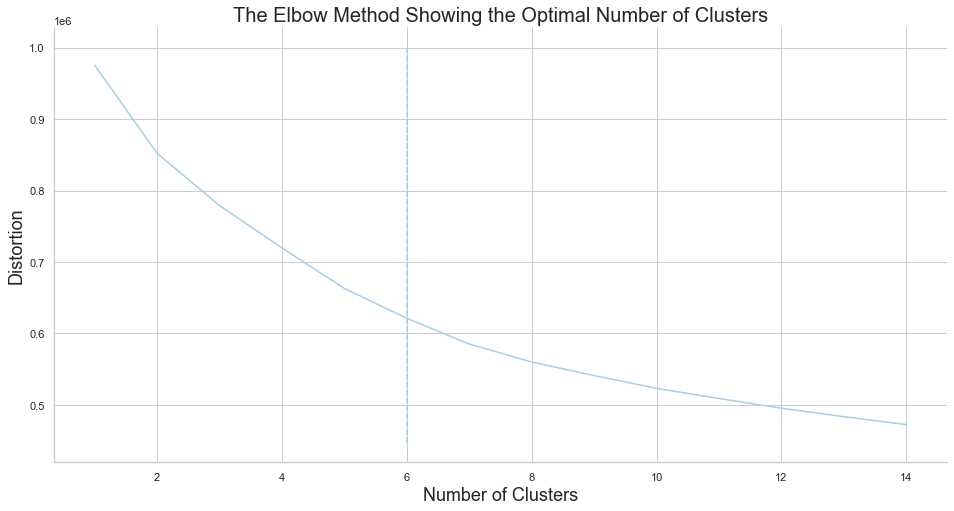

In [186]:
#Elbow method to select optimum number of clusters
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets


distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principalDF)
    distortions.append(kmeanModel.inertia_)

from kneed import KneeLocator
import matplotlib.pyplot as plt
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
print(kn.elbow)

plt.figure(figsize=(16,8))
sb.lineplot(x = K,y = distortions)
sb.despine()
plt.xlabel('Number of Clusters', fontsize = 18)
plt.ylabel('Distortion', fontsize = 18)
plt.title('The Elbow Method Showing the Optimal Number of Clusters', fontsize = 20)
plt.vlines(kn.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

In [ ]:
#Silhouette Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
   
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(principalDF)
    label = kmeans.labels_
    sil_coeff = silhouette_score(principalDF, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [187]:
opt_clusters = 5
kmeanModel = KMeans(n_clusters=opt_clusters)
kmeanModel.fit(principalDF)
principalDF['k_means']=kmeanModel.predict(principalDF)
principalDF

,0,1,2,3,4,5,6,7,8,9,k_means
0,-0.323942,-0.084281,-0.429661,0.539490,0.316716,-0.193799,-0.552014,-0.386483,-1.078083,-0.196367,2
1,0.378961,1.939718,-1.175013,-1.792848,-0.728229,-0.156206,0.386362,-1.590256,1.393964,-0.722652,2
2,-1.113958,-1.430243,-0.370018,-0.188560,-0.127277,0.513607,0.341231,0.172161,-1.670083,1.202473,2
3,-0.272934,-1.200805,-0.400036,-0.307038,0.730169,0.551727,0.424344,0.271747,-1.539700,0.879469,2
4,-0.370050,-0.649380,-0.404402,0.609033,0.219347,-0.063008,0.235505,1.458883,0.654913,-0.757454,0
...,...,...,...,...,...,...,...,...,...,...,...
88121,-1.826875,-0.471558,-0.708576,-0.523885,-0.791952,-0.073676,0.440258,-0.226395,-1.249119,0.216267,2
88122,3.154014,0.408757,-0.644953,0.079588,0.663705,0.639289,-0.108505,-0.735520,0.443957,-0.107262,1
88123,0.202027,0.831357,0.260427,1.191550,-0.650423,0.491968,-0.135471,-0.139160,-1.301201,0.165711,2
88124,-0.870366,-0.393651,1.689146,-0.287536,-0.359576,0.293314,-0.088890,-0.815770,0.235778,-0.083596,0


In [188]:
music_features.reset_index(inplace=True)
music_features['k_means'] = principalDF['k_means']
music_features

,index,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,k_means
0,160541,0.131,0.748,188491.0,0.627,000xQL6tZNLJzIrtIgxqSl,0.000000,7.0,0.0852,1.0,0.0639,120.963,4.0,0.524,2
1,45268,0.684,0.509,187119.0,0.803,000xYdQfIZ4pDmBGzQalKU,0.000539,0.0,0.4630,1.0,0.0400,166.018,4.0,0.651,2
2,236479,0.105,0.772,167866.0,0.635,001b8t3bYPfnabpjpfG1Y4,0.000000,9.0,0.1170,1.0,0.3720,95.951,4.0,0.541,2
3,218937,0.145,0.807,188395.0,0.552,001cKCt7jEOzXjqgkn9DQf,0.000000,8.0,0.0999,1.0,0.3050,119.988,4.0,0.287,2
4,193090,0.159,0.683,180933.0,0.676,003F0rm5lqxcmhvJPKgfaJ,0.000000,1.0,0.0726,0.0,0.1470,98.992,4.0,0.434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88121,154441,0.036,0.850,136913.0,0.739,7zy0jQ2un779v9bmBrBVCV,0.000000,7.0,0.2890,1.0,0.2290,112.063,4.0,0.602,2
88122,155996,0.728,0.423,260573.0,0.360,7zyYmIdjqqiX6kLryb7QBx,0.000000,3.0,0.1050,1.0,0.0372,130.576,4.0,0.291,1
88123,101624,0.200,0.637,241564.0,0.741,7zyofXGhXgaqT8fhvLufdf,0.000000,9.0,0.1850,1.0,0.0300,89.982,4.0,0.419,2
88124,114871,0.353,0.819,208608.0,0.679,7zzI3SbctTJN6wDerZNZCD,0.000000,11.0,0.2910,0.0,0.1040,139.983,4.0,0.551,0


### Compare Clustering Results 

In [ ]:
total_clustered = music_features[music_features['HC Cluster'].notnull()].size

In [ ]:
clus_comp = music_features[music_features['HC Cluster'].notnull()]
total_matching = clus_comp.loc[clus_comp['HC Cluster'] == clus_comp['k_means']].size

In [ ]:
total_matching/total_clustered

In [ ]:
#Plotting clusters between variables pairs.
sns.pairplot(music_features, hue = 'k_means')

In [189]:
from sklearn.preprocessing import MinMaxScaler


scaled_df = music_features[features].copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(scaled_df) 
scaled_df.loc[:,:] = scaled_values
scaled_df['k_means'] = music_features["k_means"]
scaled_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,k_means
0,0.131526,0.757085,0.047786,0.627,0.000000,0.636364,0.086061,1.0,0.066149,0.525309,0.8,0.524525,2
1,0.686747,0.515182,0.047436,0.803,0.000546,0.000000,0.467677,1.0,0.041408,0.720971,0.8,0.651652,2
2,0.105422,0.781377,0.042529,0.635,0.000000,0.818182,0.118182,1.0,0.385093,0.416689,0.8,0.541542,2
3,0.145582,0.816802,0.047762,0.552,0.000000,0.727273,0.100909,1.0,0.315735,0.521075,0.8,0.287287,2
4,0.159639,0.691296,0.045860,0.676,0.000000,0.090909,0.073333,0.0,0.152174,0.429895,0.8,0.434434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88121,0.036145,0.860324,0.034640,0.739,0.000000,0.636364,0.291919,1.0,0.237060,0.486659,0.8,0.602603,2
88122,0.730924,0.428138,0.066158,0.360,0.000000,0.272727,0.106061,1.0,0.038509,0.567056,0.8,0.291291,1
88123,0.200803,0.644737,0.061313,0.741,0.000000,0.818182,0.186869,1.0,0.031056,0.390767,0.8,0.419419,2
88124,0.354418,0.828947,0.052913,0.679,0.000000,1.000000,0.293939,0.0,0.107660,0.607908,0.8,0.551552,0


In [190]:
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt

fig = go.Figure()
angles = features
angles.append(angles[0])
layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))
for i in range(opt_clusters):
    subset = scaled_df[scaled_df['k_means'] == i]
    data = [np.mean(subset[col]) for col in features]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True,template='plotly_dark'
        )
fig.show()

In [191]:
scaled_qty = scaled_df.groupby(["k_means"])["k_means"].count()
scaled_qty_df = pd.DataFrame(scaled_qty)
scaled_qty_df.index.name = None
scaled_qty_df = scaled_qty_df.rename(columns = {'k_means': 'Songs'}, inplace = False)
scaled_qty_df

,Songs
0,33106
1,14819
2,33974
3,2006
4,4221


In [192]:
#Plot bar of quantities
scaled_qty_df = scaled_qty_df.reset_index(inplace = False)
scaled_qty_df = scaled_qty_df.rename(columns = {'index': 'Cluster'}, inplace = False)
scaled_qty_df

,Cluster,Songs
0,0,33106
1,1,14819
2,2,33974
3,3,2006
4,4,4221


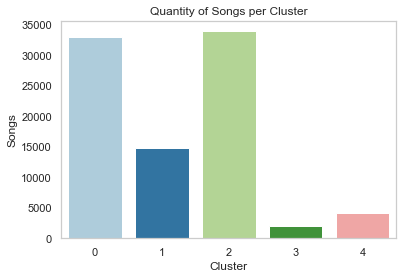

In [193]:
sb.set_palette("Paired")

#sb.set_theme(style="whitegrid")
ax = sb.barplot(y = "Songs", x = "Cluster", data=scaled_qty_df)

ax.set_title('Quantity of Songs per Cluster')
# Turns off grid on the left Axis.
ax.grid(False)

# Save a palette to a variable:
#palette = sb.color_palette("dense")
 


## Country rankings

In [194]:
#Read music feature data into python
file_name = 'top_tracks.csv'
top_tracks = pd.read_csv(file_name)

In [195]:
top_tracks = top_tracks.drop(columns=['Unnamed: 0'])

In [196]:
id_clusters_df = music_features[['id','k_means']].copy()
id_clusters_df

,id,k_means
0,000xQL6tZNLJzIrtIgxqSl,2
1,000xYdQfIZ4pDmBGzQalKU,2
2,001b8t3bYPfnabpjpfG1Y4,2
3,001cKCt7jEOzXjqgkn9DQf,2
4,003F0rm5lqxcmhvJPKgfaJ,0
...,...,...
88121,7zy0jQ2un779v9bmBrBVCV,2
88122,7zyYmIdjqqiX6kLryb7QBx,1
88123,7zyofXGhXgaqT8fhvLufdf,2
88124,7zzI3SbctTJN6wDerZNZCD,0


In [197]:
results = top_tracks.merge(id_clusters_df, on="id")
results

,Position,Track Name,Artist,Streams,URL,Date,code,name,id,k_means
0,1,Reggaetón Lento (Bailemos),CNCO,6784,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,bo,Bolivia,3AEZUABDXNtecAOSC1qTfo,0
1,4,Reggaetón Lento (Bailemos),CNCO,5760,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,hn,Honduras,3AEZUABDXNtecAOSC1qTfo,0
2,7,Reggaetón Lento (Bailemos),CNCO,1846,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ni,Nicaragua,3AEZUABDXNtecAOSC1qTfo,0
3,38,Reggaetón Lento (Bailemos),CNCO,1116627,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,global,Global,3AEZUABDXNtecAOSC1qTfo,0
4,1,Reggaetón Lento (Bailemos),CNCO,8163,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,gt,Guatemala,3AEZUABDXNtecAOSC1qTfo,0
...,...,...,...,...,...,...,...,...,...,...
9927871,108,GO! (with BIG30),Moneybagg Yo,304622,https://open.spotify.com/track/4VYKA63F2fcQnsv...,2021-04-16,us,United States,4VYKA63F2fcQnsvfWUpzn9,2
9927872,154,That Go! (feat. T-Shyne),Young Stoner Life,247931,https://open.spotify.com/track/6rUmUJ2drFemHTH...,2021-04-16,us,United States,6rUmUJ2drFemHTH73bFAKQ,2
9927873,95,Dejo Atrás,No Te Va Gustar,3194,https://open.spotify.com/track/60FasBAOZzjNCSo...,2021-04-16,uy,Uruguay,60FasBAOZzjNCSoljbbASM,2
9927874,113,Có Chàng Trai Viết Lên Cây,Phan Mạnh Quỳnh,6132,https://open.spotify.com/track/2NEzxeMKW0mk5pr...,2021-04-16,vn,Viet Nam,2NEzxeMKW0mk5pr7tcrvs2,1


In [198]:
results.groupby(by=["k_means"]).sum()

,Position,Streams
k_means,,
0,348912416,211701925585
1,164911469,75023111854
2,406994440,245434717432
3,5581049,2366442372
4,32800347,15825823655


In [199]:
cluster_country_streams = results.groupby(['code', 'k_means']).agg({'Streams': ['sum'], 'Position': ['mean'], 'Position': ['min']})
cluster_country_streams

Streams Position
                    sum      min
code k_means                    
ae   0         42825695        1
     1         19994442        1
     2         38937630        1
     3           614494        2
     4          3428027        2
...                 ...      ...
za   0        116513904        1
     1         50533956        1
     2        126459593        1
     3          6021708        2
     4          8405985        1

[345 rows x 2 columns]

In [200]:
#Grouping by country
cluster_country = results.groupby(['name', 'k_means']).agg({'Streams': ['sum']})
cluster_country.columns = cluster_country.columns.droplevel(1)
cluster_country

Streams
name      k_means            
Argentina 0        3739533330
          1         430785711
          2        4327762446
          3           9832853
          4         201364716
...                       ...
Viet Nam  0         160995525
          1         204830663
          2         158930818
          3           3667415
          4          30332081

[345 rows x 1 columns]

In [201]:
#Grouping by country
cluster_country
cluster_country_pcts = cluster_country.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
cluster_country_pcts.reset_index(inplace = True)
cluster_country_pcts

#cluster_country_pcts.to_excel("cluster_country_pcts.xlsx")

,name,k_means,Streams
0,Argentina,0,0.429373
1,Argentina,1,0.049463
2,Argentina,2,0.496914
3,Argentina,3,0.001129
4,Argentina,4,0.023121
...,...,...,...
340,Viet Nam,0,0.288132
341,Viet Nam,1,0.366583
342,Viet Nam,2,0.284437
343,Viet Nam,3,0.006564


In [202]:
#Creating a dataframe depending on the year
my_year = ""

#Activate if searching for specific year
#results_year = results.loc[top_tracks['Date'].str.contains(my_year)]

#Activate if looking for all years
results_year = results.copy()

results_year

,Position,Track Name,Artist,Streams,URL,Date,code,name,id,k_means
0,1,Reggaetón Lento (Bailemos),CNCO,6784,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,bo,Bolivia,3AEZUABDXNtecAOSC1qTfo,0
1,4,Reggaetón Lento (Bailemos),CNCO,5760,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,hn,Honduras,3AEZUABDXNtecAOSC1qTfo,0
2,7,Reggaetón Lento (Bailemos),CNCO,1846,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ni,Nicaragua,3AEZUABDXNtecAOSC1qTfo,0
3,38,Reggaetón Lento (Bailemos),CNCO,1116627,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,global,Global,3AEZUABDXNtecAOSC1qTfo,0
4,1,Reggaetón Lento (Bailemos),CNCO,8163,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-02,gt,Guatemala,3AEZUABDXNtecAOSC1qTfo,0
...,...,...,...,...,...,...,...,...,...,...
9927871,108,GO! (with BIG30),Moneybagg Yo,304622,https://open.spotify.com/track/4VYKA63F2fcQnsv...,2021-04-16,us,United States,4VYKA63F2fcQnsvfWUpzn9,2
9927872,154,That Go! (feat. T-Shyne),Young Stoner Life,247931,https://open.spotify.com/track/6rUmUJ2drFemHTH...,2021-04-16,us,United States,6rUmUJ2drFemHTH73bFAKQ,2
9927873,95,Dejo Atrás,No Te Va Gustar,3194,https://open.spotify.com/track/60FasBAOZzjNCSo...,2021-04-16,uy,Uruguay,60FasBAOZzjNCSoljbbASM,2
9927874,113,Có Chàng Trai Viết Lên Cây,Phan Mạnh Quỳnh,6132,https://open.spotify.com/track/2NEzxeMKW0mk5pr...,2021-04-16,vn,Viet Nam,2NEzxeMKW0mk5pr7tcrvs2,1


In [203]:
songs_by_conutry = top_tracks.loc[top_tracks['code'] == "jp"]
songs_by_conutry.head(20)

,Position,Track Name,Artist,Streams,URL,Date,code,name,id
4055,1,Closer,The Chainsmokers,9162,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-04,jp,Japan,7BKLCZ1jbUBVqRi2FVlTVw
4056,2,Let Me Love You,DJ Snake,7447,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-04,jp,Japan,4pdPtRcBmOSQDlJ3Fk945m
4057,3,Don't Wanna Know,Maroon 5,7122,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2017-01-04,jp,Japan,5MFzQMkrl1FOOng9tq6R9r
4058,4,24K Magic,Bruno Mars,6599,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,2017-01-04,jp,Japan,6b8Be6ljOzmkOmFslEb23P
4059,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,6473,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-04,jp,Japan,3NdDpSvN911VPGivFlV5d0
4060,6,Starboy,The Weeknd,6433,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-04,jp,Japan,5aAx2yezTd8zXrkmtKl66Z
4061,7,I Feel It Coming,The Weeknd,6288,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-04,jp,Japan,5GXAXm5YOmYT0kL5jHvYBt
4062,8,Call On Me - Ryan Riback Extended Remix,Starley,6090,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-04,jp,Japan,78rIJddV4X0HkNAInEcYde
4063,9,Cold Water (feat. Justin Bieber & MØ),Major Lazer,5621,https://open.spotify.com/track/6DNtNfH8hXkqOX1...,2017-01-04,jp,Japan,6DNtNfH8hXkqOX1sjqmI7p
4064,10,Say You Won't Let Go,James Arthur,5565,https://open.spotify.com/track/5uCax9HTNlzGybI...,2017-01-04,jp,Japan,5uCax9HTNlzGybIStD3vDh


In [204]:
#Grouping by cluster and country
cluster_country_cluster = results_year.groupby(['k_means','code']).agg({'Streams': ['sum']})
cluster_country_cluster

cluster_country_cluster_pcts = cluster_country_cluster.groupby(level=0).apply(lambda x:
                                                 x / float(x.sum()))
cluster_country_cluster_pcts.columns = cluster_country_cluster_pcts.columns.droplevel(1)

cluster_country_cluster_pcts.reset_index(inplace = True)
cluster_country_cluster_pcts

,k_means,code,Streams
0,0,ae,0.000202
1,0,ar,0.017664
2,0,at,0.002772
3,0,au,0.016286
4,0,be,0.003442
...,...,...,...
340,4,ua,0.000181
341,4,us,0.127737
342,4,uy,0.000894
343,4,vn,0.001917


In [205]:
#Erase global
cluster_country_cluster_pcts = cluster_country_cluster_pcts[cluster_country_cluster_pcts.code != "global"]
cluster_country_cluster_pcts

,k_means,code,Streams
0,0,ae,0.000202
1,0,ar,0.017664
2,0,at,0.002772
3,0,au,0.016286
4,0,be,0.003442
...,...,...,...
340,4,ua,0.000181
341,4,us,0.127737
342,4,uy,0.000894
343,4,vn,0.001917


In [206]:
#Adding iso3 country codes
import country_converter as coco
import plotly.express as px

iso2_codes = cluster_country_cluster_pcts['code']
cluster_country_cluster_pcts['country code'] = coco.convert(names=iso2_codes, to='ISO3')
# add country name by applying the convert method
cluster_country_cluster_pcts['country name'] = cluster_country_cluster_pcts.code.apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
cluster_country_cluster_pcts

<ipython-input-206-67c09c7252c3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-206-67c09c7252c3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,k_means,code,Streams,country code,country name
0,0,ae,0.000202,ARE,United Arab Emirates
1,0,ar,0.017664,ARG,Argentina
2,0,at,0.002772,AUT,Austria
3,0,au,0.016286,AUS,Australia
4,0,be,0.003442,BEL,Belgium
...,...,...,...,...,...
340,4,ua,0.000181,UKR,Ukraine
341,4,us,0.127737,USA,United States
342,4,uy,0.000894,URY,Uruguay
343,4,vn,0.001917,VNM,Vietnam


In [207]:
#Obtaining sepecific cluster
sp_cluster = 4
ranking_cluster = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == sp_cluster]
ranking_cluster.sort_values(by=['Streams'], ascending=False).head(10)


,k_means,code,Streams,country code,country name
341,4,us,0.127737,USA,United States
318,4,mx,0.072741,MEX,Mexico
283,4,br,0.040606,BRA,Brazil
299,4,gb,0.035773,GBR,United Kingdom
298,4,fr,0.029467,FRA,France
311,4,it,0.029261,ITA,Italy
306,4,id,0.026348,IDN,Indonesia
326,4,ph,0.025085,PHL,Philippines
290,4,de,0.022863,DEU,Germany
333,4,se,0.019487,SWE,Sweden


In [208]:
#Plotting map

map_title = "Cluster " + str(sp_cluster) 
fig = px.choropleth(ranking_cluster, locations="country code",
                    color="Streams", # lifeExp is a column of gapminder
                    hover_name="country name", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.RdYlGn,
                    title = map_title
                   )
fig.show()

In [209]:
#Obtain sepecific cluster
ranking_cluster_nousa = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == 0]
#Erase USA
ranking_cluster_nousa = ranking_cluster_nousa[cluster_country_cluster_pcts.code != "us"]
ranking_cluster_nousa.sort_values(by=['Streams'], ascending=False).head(10)

<ipython-input-209-5f59ba575a43>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,k_means,code,Streams,country code,country name
14,0,de,0.047126,DEU,Germany
7,0,br,0.043494,BRA,Brazil
42,0,mx,0.037186,MEX,Mexico
23,0,gb,0.032112,GBR,United Kingdom
22,0,fr,0.028176,FRA,France
20,0,es,0.025789,ESP,Spain
35,0,it,0.025445,ITA,Italy
45,0,nl,0.018428,NLD,Netherlands
1,0,ar,0.017664,ARG,Argentina
8,0,ca,0.016585,CAN,Canada


In [210]:
#Plotting map
fig = px.choropleth(ranking_cluster_nousa, locations="country code",
                    color="Streams", # lifeExp is a column of gapminder
                    hover_name="country name", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.RdYlGn)
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
fig.show()

In [211]:
#Merging top 10 countries of each cluster
appended_data = []
for x in range(opt_clusters):
    ranking_cluster = cluster_country_cluster_pcts.loc[cluster_country_cluster_pcts['k_means'] == x]
    list_cluster = ranking_cluster.sort_values(by=['Streams'], ascending=False).head(10)
    # store DataFrame in list
    appended_data.append(list_cluster)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)
appended_data

,k_means,code,Streams,country code,country name
65,0,us,0.121710,USA,United States
14,0,de,0.047126,DEU,Germany
7,0,br,0.043494,BRA,Brazil
42,0,mx,0.037186,MEX,Mexico
23,0,gb,0.032112,GBR,United Kingdom
22,0,fr,0.028176,FRA,France
20,0,es,0.025789,ESP,Spain
35,0,it,0.025445,ITA,Italy
45,0,nl,0.018428,NLD,Netherlands
1,0,ar,0.017664,ARG,Argentina


In [212]:
countries_matrix = appended_data.pivot_table(index=['country code'], columns=['k_means'])
countries_matrix


Streams                                        
k_means              0         1         2         3         4
country code                                                  
ARG           0.017664       NaN  0.017633       NaN       NaN
AUS                NaN  0.021814  0.018183  0.028428       NaN
BRA           0.043494  0.031193  0.052980  0.027472  0.040606
CAN                NaN  0.018114  0.017570  0.015416       NaN
DEU           0.047126  0.017237  0.031979  0.060870  0.022863
ESP           0.025789       NaN  0.025693       NaN       NaN
FRA           0.028176       NaN       NaN  0.026339  0.029467
GBR           0.032112  0.031203  0.033003  0.035563  0.035773
IDN                NaN  0.040290       NaN  0.033357  0.026348
ITA           0.025445       NaN  0.022774       NaN  0.029261
MEX           0.037186  0.027658  0.041586  0.031890  0.072741
NLD           0.018428       NaN       NaN       NaN       NaN
PHL                NaN  0.049064       NaN       NaN  0.025085
SWE                NaN  0.016988       NaN       NaN  0.019487
TUR                NaN       NaN       NaN  0.075272       NaN
USA           0.121710  0.132861  0.130566  0.120465  0.127737

In [213]:
countries_all_clusters = countries_matrix.copy()
countries_all_clusters.columns = countries_all_clusters.columns.droplevel(0)
countries_all_clusters.reset_index(inplace = True)
countries_all_clusters.columns.name = "Index"
columns_names = countries_all_clusters.columns

countries_all_clusters = countries_matrix.copy()
countries_all_clusters.columns = countries_all_clusters.columns.droplevel(1)
countries_all_clusters.reset_index(inplace = True)
countries_all_clusters.columns = columns_names
countries_all_clusters = countries_all_clusters.rename(columns = {'country code': 'Country'}, inplace = False)
countries_all_clusters = countries_all_clusters.round(3)
countries_all_clusters
#countries_all_clusters.reset_index(inplace = True)

Index,Country,0,1,2,3,4
0,ARG,0.018,NaN,0.018,NaN,NaN
1,AUS,NaN,0.022,0.018,0.028,NaN
2,BRA,0.043,0.031,0.053,0.027,0.041
3,CAN,NaN,0.018,0.018,0.015,NaN
4,DEU,0.047,0.017,0.032,0.061,0.023
5,ESP,0.026,NaN,0.026,NaN,NaN
6,FRA,0.028,NaN,NaN,0.026,0.029
7,GBR,0.032,0.031,0.033,0.036,0.036
8,IDN,NaN,0.040,NaN,0.033,0.026
9,ITA,0.025,NaN,0.023,NaN,0.029


In [214]:
#Countries with presence in all clusters
countries_all_clusters_nan = countries_all_clusters.dropna()
countries_all_clusters_nan = countries_all_clusters_nan.round(3)
countries_all_clusters_nan

Index,Country,0,1,2,3,4
2,BRA,0.043,0.031,0.053,0.027,0.041
4,DEU,0.047,0.017,0.032,0.061,0.023
7,GBR,0.032,0.031,0.033,0.036,0.036
10,MEX,0.037,0.028,0.042,0.032,0.073
15,USA,0.122,0.133,0.131,0.120,0.128


In [215]:
countries_values = countries_all_clusters.set_index('Country')
maxValueIndex = countries_values.idxmax(axis = 1)
countries_best_cluster = pd.DataFrame(maxValueIndex)
countries_best_cluster.reset_index(inplace = True)
countries_best_cluster = countries_best_cluster.rename(columns = {0: 'Best Cluster'}, inplace = False)
countries_best_cluster = countries_best_cluster.sort_values(by=['Best Cluster'], ascending=True)
countries_best_cluster['Best Cluster']= countries_best_cluster['Best Cluster'].astype(str)
countries_best_cluster

,Country,Best Cluster
0,ARG,0
5,ESP,0
11,NLD,0
3,CAN,1
8,IDN,1
12,PHL,1
15,USA,1
2,BRA,2
1,AUS,3
4,DEU,3


In [216]:
#Plotting map
fig = px.choropleth(countries_best_cluster, locations="Country",
                    color="Best Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", title = "Cluster with the Highest Quantity of Streams Per Country" # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
#                    color_discrete_sequence="viridis")
#                    color_discrete_sequence=px.colors.diverging.RdYlGn[::-1])
#                    color_continuous_scale="dense"
                   )
fig.show()

In [217]:

countries_all_clusters.set_index('Country')
countries_all_clusters

Index,Country,0,1,2,3,4
0,ARG,0.018,NaN,0.018,NaN,NaN
1,AUS,NaN,0.022,0.018,0.028,NaN
2,BRA,0.043,0.031,0.053,0.027,0.041
3,CAN,NaN,0.018,0.018,0.015,NaN
4,DEU,0.047,0.017,0.032,0.061,0.023
5,ESP,0.026,NaN,0.026,NaN,NaN
6,FRA,0.028,NaN,NaN,0.026,0.029
7,GBR,0.032,0.031,0.033,0.036,0.036
8,IDN,NaN,0.040,NaN,0.033,0.026
9,ITA,0.025,NaN,0.023,NaN,0.029


In [218]:
#Ranking per cluster per country
result_rank = countries_all_clusters.rank(ascending=False)
countries = countries_all_clusters['Country']
result_rank = result_rank.drop(columns=["Country"])
result_rank.insert(0, 'Country', countries)
result_rank = result_rank.round(0)
#result_rank = result_rank.astype(str)
result_rank

Index,Country,0,1,2,3,4
0,ARG,10.0,NaN,9.0,NaN,NaN
1,AUS,NaN,7.0,9.0,7.0,NaN
2,BRA,3.0,4.0,2.0,8.0,3.0
3,CAN,NaN,8.0,9.0,10.0,NaN
4,DEU,2.0,10.0,5.0,3.0,9.0
5,ESP,7.0,NaN,6.0,NaN,NaN
6,FRA,6.0,NaN,NaN,9.0,6.0
7,GBR,5.0,4.0,4.0,4.0,4.0
8,IDN,NaN,3.0,NaN,5.0,7.0
9,ITA,8.0,NaN,7.0,NaN,6.0


In [219]:
result_rank_int = result_rank.copy()
result_rank_int = result_rank_int.fillna(0)
result_rank_int.iloc[:,1:6] = result_rank_int.iloc[:,1:6].astype(int)
result_rank_int

Index,Country,0,1,2,3,4
0,ARG,10,0,9,0,0
1,AUS,0,7,9,7,0
2,BRA,3,4,2,8,3
3,CAN,0,8,9,10,0
4,DEU,2,10,5,3,9
5,ESP,7,0,6,0,0
6,FRA,6,0,0,9,6
7,GBR,5,4,4,4,4
8,IDN,0,3,0,5,7
9,ITA,8,0,7,0,6


In [220]:
result_rank_int_nan = result_rank.dropna()
result_rank_int_nan = result_rank_int_nan.round(3)
result_rank_int_nan.iloc[:,1:6] = result_rank_int_nan.iloc[:,1:6].astype(int)
result_rank_int_nan

Index,Country,0,1,2,3,4
2,BRA,3,4,2,8,3
4,DEU,2,10,5,3,9
7,GBR,5,4,4,4,4
10,MEX,4,6,3,6,2
15,USA,1,1,1,1,1


In [221]:
#Plotting map

fig = px.choropleth(result_rank, locations="Country",
                    color=0, # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Greens)
#                    color_continuous_scale=px.colors.sequential.Tealgrn[::-1])
                    color_continuous_scale=px.colors.diverging.RdYlGn[::-1])
fig.show()

In [222]:
#Rankings per country

from IPython.core import display as ICD

result_rank_2 = result_rank.copy()

for x in range(0,opt_clusters):
#    b = str(x)
    ranking_table = result_rank_2[['Country', x]]
    ranking_table = ranking_table.sort_values(by=[x], ascending=True).head(5)
    ranking_table = ranking_table.astype(str)
    ranking_table = ranking_table.style.hide_index()        
    ICD.display(ranking_table)

Country,0
USA,1.0
DEU,2.0
BRA,3.0
MEX,4.0
GBR,5.0


Country,1
USA,1.0
PHL,2.0
IDN,3.0
BRA,4.0
GBR,4.0


Country,2
USA,1.0
BRA,2.0
MEX,3.0
GBR,4.0
DEU,5.0


Country,3
USA,1.0
TUR,2.0
DEU,3.0
GBR,4.0
IDN,5.0


Country,4
USA,1.0
MEX,2.0
BRA,3.0
GBR,4.0
FRA,6.0


In [223]:
countries_matrix_2 = cluster_country_cluster_pcts.pivot_table(index=['country code'], columns=['k_means'])
countries_matrix_2

Streams                                        
k_means              0         1         2         3         4
country code                                                  
ARE           0.000202  0.000267  0.000159  0.000260  0.000217
ARG           0.017664  0.005742  0.017633  0.004155  0.012724
AUS           0.016286  0.021814  0.018183  0.028428  0.017848
AUT           0.002772  0.001537  0.002141  0.004163  0.001687
BEL           0.003442  0.003951  0.003011  0.007434  0.003552
...                ...       ...       ...       ...       ...
UKR           0.000250  0.000130  0.000171  0.001046  0.000181
URY           0.001281  0.000279  0.001270  0.000231  0.000894
USA           0.121710  0.132861  0.130566  0.120465  0.127737
VNM           0.000760  0.002730  0.000648  0.001550  0.001917
ZAF           0.000550  0.000674  0.000515  0.002545  0.000531

[68 rows x 5 columns]

In [224]:
countries_all_clusters_2 = countries_matrix_2.copy()
countries_all_clusters_2.columns = countries_all_clusters_2.columns.droplevel(0)
countries_all_clusters_2.reset_index(inplace = True)
countries_all_clusters_2.columns.name = "Index"
columns_names = countries_all_clusters_2.columns

countries_all_clusters_2 = countries_matrix_2.copy()
countries_all_clusters_2.columns = countries_all_clusters_2.columns.droplevel(1)
countries_all_clusters_2.reset_index(inplace = True)
countries_all_clusters_2.columns = columns_names
countries_all_clusters_2 = countries_all_clusters_2.rename(columns = {'country code': 'Country'}, inplace = False)
countries_all_clusters_2
#countries_all_clusters.reset_index(inplace = True)

Index,Country,0,1,2,3,4
0,ARE,0.000202,0.000267,0.000159,0.000260,0.000217
1,ARG,0.017664,0.005742,0.017633,0.004155,0.012724
2,AUS,0.016286,0.021814,0.018183,0.028428,0.017848
3,AUT,0.002772,0.001537,0.002141,0.004163,0.001687
4,BEL,0.003442,0.003951,0.003011,0.007434,0.003552
...,...,...,...,...,...,...
63,UKR,0.000250,0.000130,0.000171,0.001046,0.000181
64,URY,0.001281,0.000279,0.001270,0.000231,0.000894
65,USA,0.121710,0.132861,0.130566,0.120465,0.127737
66,VNM,0.000760,0.002730,0.000648,0.001550,0.001917


In [225]:
countries_values = countries_all_clusters_2.set_index('Country')
maxValueIndex_2 = countries_values.idxmax(axis = 1)
countries_best_cluster_2 = pd.DataFrame(maxValueIndex_2)
countries_best_cluster_2.reset_index(inplace = True)
countries_best_cluster_2 = countries_best_cluster_2.rename(columns = {0: 'Best Cluster'}, inplace = False)
countries_best_cluster_2 = countries_best_cluster_2.sort_values(by=['Best Cluster'], ascending=True)
countries_best_cluster_2 = countries_best_cluster_2.astype({"Best Cluster": str})
countries_best_cluster_2

,Country,Best Cluster
1,ARG,0
64,URY,0
15,DNK,0
51,PRT,0
50,POL,0
...,...,...
40,MAR,4
41,MEX,4
42,MYS,4
59,SWE,4


In [226]:
#Plotting map

#colorscale = ["003f5c","58508d","bc5090","ff6361","ffa600"]


fig = px.choropleth(countries_best_cluster_2, locations="Country",
                    color="Best Cluster", # lifeExp is a column of gapminder
                    hover_name="Country", title = "Cluster with the Highest Quantity of Streams Per Country", # column to add to hover information
#                    color_continuous_scale=px.colors.sequential.Tealgrn)
#                    color_discrete_sequence=colorscale)
#                    color_discrete_sequence= "earth" )
                    color_continuous_scale="dense")
fig.show()